# Visualização de Dados Acidentes por Ocorrência em Rodovias Federais

## Perguntas: 

CONSULTAS SOBRE ACIDENTES EM RODOVIAS NO BRASIL, BLOCO 01:

1. QUANTAS OCORRENCIAS DE ACIDENTES POR ANO / MES / DIA / HORA
1. QUAIS OS TIPOS DE ACIDENTES NO GERAL E POR ANO
1. QUANTIDADE DE ACIDENTES POR ESTADO GERAL E AO ANO
1. ACIDENTES POR FASES DO DIA POR ANO
1. ACIDENTES POR DIA DA SEMANA POR ANO
1. ACIDENTES POR CONDICAO METEREOLOGICA GERAL E AO ANO
1. ACIDENTES POR CAUSA NO GERAL E AO ANO
1. QUANTIDADE DE FERIDOS, IGNORADOS, ILESOS E MORTOS NO GERAL E AO ANO
1. DIVERGENCIA PERCENTUAL DE QUANTIDADE DE ACIDENTES ENTRE OS ANOS
1. HEATMAP DADOS GEOLOCALIZADOS 2017-2018

In [1]:
import pandas as pd, psycopg2, seaborn as sns, matplotlib.pyplot as plt, numpy as np, cufflinks as cf, folium

/home/jovyan/.local/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
# !pip install cufflinks

In [3]:
import os


dir_1=os.getcwd()
print(os.getcwd())
# print (df_bus_mg_01 )
os.chdir('/home/jovyan/srjn4_atlas/SEINFRA/dataviz/')


os.chdir('./viz/figures/adv-ocorrencia-acidentes-prf/')

# print(os.getcwd())
# os.chdir(dir_1)
print(os.getcwd())

/home/jovyan/srjn4_atlas/atlas-estado/scripts-python/dataviz
/home/jovyan/srjn4_atlas/SEINFRA/dataviz/viz/figures/adv-ocorrencia-acidentes-prf


In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import Fullscreen
from folium.plugins import MiniMap

In [5]:
%config IPCompleter.greedy=True
%matplotlib inline
cf.go_offline()
cf.getThemes()
cf.set_config_file(theme='pearl')

In [6]:
# conn = psycopg2.connect("host=10.2.40.10 dbname=db_testes_diversos user=i3geoconsulta password=i3geoconsulta")
conn = psycopg2.connect("host=psql10-rj dbname=db_testes_diversos user=i3geoconsulta password=i3geoconsulta")
# conn.close()

## 1. Quantas Ocorrências de Acidentes por Ano / Mês / Dia e Hora?

### 1.1 Quantas Ocorrências de Acidentes por Ano?

In [7]:
sql1 = """select date_part('year', datahora) as ano, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by ano
order by ano asc;"""

df_aci_oco1 = pd.read_sql_query(sql1, con=conn)
df_aci_oco1['ano'] = df_aci_oco1['ano'].astype('int64')
df_aci_oco1
display(df_aci_oco1)

ano  qtd_ocorrencias_acidentes
0   2007                     127675
1   2008                     141043
2   2009                     158646
3   2010                     183469
4   2011                     192326
5   2012                     184568
6   2013                     186748
7   2014                     169201
8   2015                     122161
9   2016                      96363
10  2017                      89518
11  2018                      69206

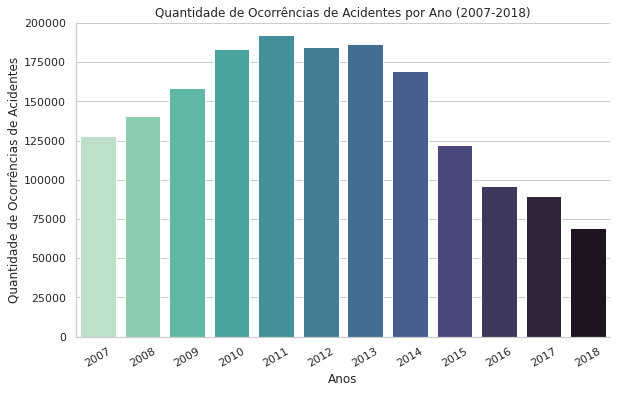

In [8]:
sns.set(style="whitegrid")
viz1 = sns.catplot(kind="bar", 
                   x='ano',
                   y='qtd_ocorrencias_acidentes', 
                   data=df_aci_oco1, 
                   aspect=1.7,
                   palette="mako_r")
viz1.ax.set_title("Quantidade de Ocorrências de Acidentes por Ano (2007-2018)")
viz1.set_axis_labels("Anos","Quantidade de Ocorrências de Acidentes")
viz1.set(ylim=(0,200000))
viz1.set_xticklabels(rotation=30)
viz1.savefig("viz1.svg")

É possível identificar que desde o início de publicação dos dados em 2007, houve um aumento considerável até o ano de 2011, e a partir de 2012 começou uma indicação de redução de registros. A partir do ano de 2015 a PRF deixou de registrar acidentes sem vítimas, o que explica a redução dos anos seguintes.

De acordo com a polícia, até 50% dos acidentes ocorridos nos 70 mil quilômetros de rodovias federais não têm vítimas.
Em 2013, 62% dos acidentes ocorridos nas rodovias foram sem vítimas – 114.047. Em 2014, o índice foi de 58% – 98.295. Para a diretora-geral da polícia, Maria Alice Nascimento, o serviço vai ajudar a reduzir em 30% o deslocamento dos 10,5 mil agentes que atuam nas rodovias federais. Dessa forma, diz, eles poderão atuar em acidentes de maior gravidade.
http://g1.globo.com/distrito-federal/noticia/2015/06/prf-lanca-servico-online-para-registro-de-acidentes-sem-vitimas.html


### 1.2 Quantas Ocorrências de Acidentes por Mês?

In [10]:
sql2 = """select date_part('month', datahora) as mes, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by mes
order by mes asc;"""

df_aci_oco2 = pd.read_sql_query(sql2, con=conn)
df_aci_oco2['mes'] = df_aci_oco2['mes'].astype("int64")
df_aci_oco2

mes  qtd_ocorrencias_acidentes
0     1                     147560
1     2                     134569
2     3                     146202
3     4                     143541
4     5                     145338
5     6                     139616
6     7                     143258
7     8                     138657
8     9                     138323
9    10                     142798
10   11                     139723
11   12                     161339

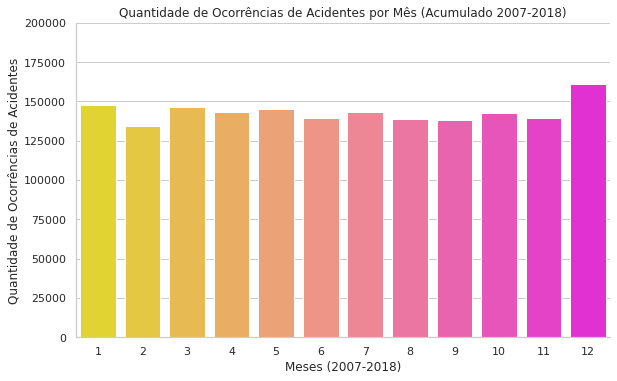

In [11]:
sns.set(style="whitegrid")
viz2 = sns.catplot(kind="bar", 
                   x='mes',
                   y='qtd_ocorrencias_acidentes', 
                   data=df_aci_oco2, 
                   aspect=1.7,
                   palette="spring_r")
viz2.ax.set_title("Quantidade de Ocorrências de Acidentes por Mês (Acumulado 2007-2018)")
viz2.set_axis_labels("Meses (2007-2018)","Quantidade de Ocorrências de Acidentes")
viz2.set(ylim=(0,200000))
#viz2.set_xticklabels(rotation=30)
viz2.savefig("viz2.svg")

Através da visualização dos dados agrupados por mês ao longo de 11 anos entre 2007 e 2018, podemos identificar que o mês de Dezembro é o que se destaca ultrapassando a média de 143410 acidentes.

### 1.3 Quantas Ocorrências de Acidentes por Dia?

In [12]:
sql3 = """select date_part('day', datahora) as dia, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by dia
order by dia asc;"""

df_aci_oco3 = pd.read_sql_query(sql3, con=conn)
df_aci_oco3['dia'] = df_aci_oco3['dia'].astype("int64")
df_aci_oco3

dia  qtd_ocorrencias_acidentes
0     1                      56197
1     2                      55688
2     3                      54831
3     4                      56487
4     5                      56720
5     6                      57838
6     7                      56849
7     8                      56686
8     9                      58767
9    10                      59072
10   11                      56958
11   12                      60219
12   13                      56686
13   14                      57194
14   15                      57279
15   16                      56517
16   17                      56719
17   18                      56208
18   19                      55443
19   20                      56814
20   21                      58030
21   22                      57508
22   23                      56693
23   24                      55157
24   25                      54872
25   26                      54793
26   27                      54835
27   28                      55202
28   29                      51328
29   30                      50923
30   31                      32411

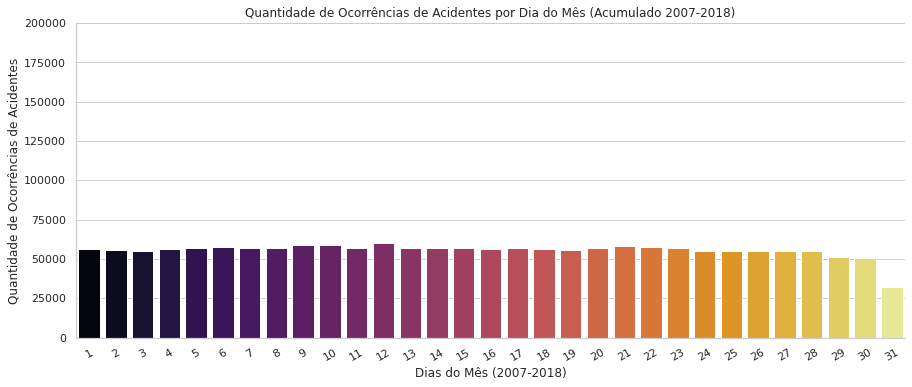

In [13]:
sns.set(style="whitegrid")
viz3 = sns.catplot(kind="bar", 
                   x='dia',
                   y='qtd_ocorrencias_acidentes', 
                   data=df_aci_oco3, 
                   aspect=2.5,
                   palette="inferno")
viz3.ax.set_title("Quantidade de Ocorrências de Acidentes por Dia do Mês (Acumulado 2007-2018)")
viz3.set_axis_labels("Dias do Mês (2007-2018)","Quantidade de Ocorrências de Acidentes")
viz3.set(ylim=(0,200000))
viz3.set_xticklabels(rotation=30)
viz3.savefig("viz3.svg")

Com esta terceira parte de visualização dos dados através do dia, é possível identificar que o dia 31 se destaca por apresentar uma quantidade de registros bem abaixo da média de 55513, lembrando que os dados são entre 2007 e 2018.

### 1.4. Quantas Ocorrências de Acidentes por Hora?

In [ ]:
sql4 = """select date_part('hour', datahora) as hora, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by hora
order by hora asc;"""

df_aci_oco4 = pd.read_sql_query(sql4, con=conn)
df_aci_oco4['hora'] = df_aci_oco4['hora'].astype("int64")
df_aci_oco4

In [ ]:
sns.set(style="whitegrid")
viz4 = sns.catplot(kind="bar", 
                   x='hora',
                   y='qtd_ocorrencias_acidentes', 
                   data=df_aci_oco4, 
                   aspect=2.0,
                   #height=5.5,
                   palette="magma_r")
viz4.ax.set_title("Quantidade de Ocorrências de Acidentes por Hora do Dia (Acumulado 2007-2018)")
viz4.set_axis_labels("Hora (2007-2018)","Quantidade de Ocorrências de Acidentes")
viz4.set(ylim=(0,200000))
viz4.set_xticklabels(rotation=30)
viz4.savefig("viz4.svg")

Esta representação agrupada de horários é bem expressiva para entendimento dos registros. Ela indica que há um aumento de registros entre 4 e 7 no período matinal, e entre 13 e 18 no período vespertino, tendo seu pico as 18hrs, com 132229 ocorrências, levando os registros a quase dobro da média (71705) ao longo do dia.

## 2. Quais os Tipos de Acidentes Geral / Ano?

### 2.1 Quais os Tipos de Acidentes Geral?

In [ ]:
sql5 = """select acioco.tipo_acidente, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by tipo_acidente
order by tipo_acidente asc;"""

df_aci_oco5 = pd.read_sql_query(sql5, con=conn)
df_aci_oco5['qtd_ocorrencias_acidentes'] = df_aci_oco5['qtd_ocorrencias_acidentes'].astype("int64")
df_aci_oco5

In [ ]:
df_aci_oco5 = df_aci_oco5.sort_values("qtd_ocorrencias_acidentes", ascending=False)
sns.set(style="whitegrid")
viz5 = sns.catplot(kind="bar",
                   x="qtd_ocorrencias_acidentes",
                      y="tipo_acidente",
                      data=df_aci_oco5,
                   aspect=1.0,
                   height=7,
                  palette="hsv_r")
viz5.ax.set_title("Tipo de Acidentes por Ocorrências (Acumulado 2007-2018)")
viz5.set(xlabel="Quantidade de Ocorrências de Acidentes (2007-2018)",
        ylabel="Tipos de Acidentes",
        xlim=(0, 500000))
sns.despine(left=True, bottom=True)
viz5.savefig("viz5.svg")

Com o gráfico 5 acima é possível identificar que o maior número de tipos de acidentes se concentra em colisão traseira, seguido de colisão lateral. Agrupando todos os tipos de classificação de acidentes, é possível verificar que existem 8 tipos de colisões diferentes. Este dado é importante para expandir a análise e identificar o que pode gerar essa quantidade grande de tipos de colisão, e totais ao longo dos anos.

### 2.2 Quais os Tipos de Acidentes Ano?

In [ ]:
sql6 = """select date_part('year', acioco.datahora) as ano, acioco.tipo_acidente, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by ano, tipo_acidente
order by ano, tipo_acidente asc;"""

df_aci_oco6 = pd.read_sql_query(sql6, con=conn)
df_aci_oco6['ano'] = df_aci_oco6['ano'].astype("int64")

In [ ]:
sns.set(style="whitegrid")
viz6=sns.lineplot(x="ano",
             y="qtd_ocorrencias_acidentes",
             hue="tipo_acidente",
             palette="tab20",
                  legend="full",linewidth=2.5,data=df_aci_oco6)
viz6.set(xlabel="Anos",
        ylabel="Tipos de Acidentes",
        xlim=(2007, 2018),
         ylim=(0, 60000))
viz6.legend(bbox_to_anchor=(1.10, 1), loc=2, borderaxespad=0.)
viz6.get_figure().savefig("viz6.svg")

Com este gráfico 6 é possível identificar que todos os tipos de acidentes diminuíram seguindo o total de acidentes a partir de 2016, porém é preciso relacionar a proporção dos tipos com totais.

## 3. Quantidade de Acidentes por Estado Acumulado / Ano

### 3.1 Quantidade de Acidentes por Estado (acumulado 2007-2018)?

In [ ]:
sql7 = """select acioco.uf as estados, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by estados
order by qtd_ocorrencias_acidentes desc;"""

df_aci_oco7 = pd.read_sql_query(sql7, con=conn)
df_aci_oco7['qtd_ocorrencias_acidentes'] = df_aci_oco7['qtd_ocorrencias_acidentes'].astype("int64")
df_aci_oco7

In [ ]:
df_aci_oco7 = df_aci_oco7.sort_values("qtd_ocorrencias_acidentes", ascending=False)
sns.set(style="whitegrid")
viz7 = sns.catplot(kind="bar",
                   x="qtd_ocorrencias_acidentes",
                      y="estados",
                      data=df_aci_oco7,
                   aspect=1.3,
                   height=6.5,
                  palette="hsv_r")
viz7.set(xlabel="Quantidade de Ocorrências de Acidentes (2007-2018)",
        ylabel="Unidades Federativas")
viz7.ax.set_title("Ocorrências de Acidentes por Unidades Federativas (2007-2018)")
sns.despine(left=True, bottom=True)
viz7.savefig("viz7.svg")

### 3.2 Quantidade de Acidentes por Estado por Ano?

In [ ]:
sql8 = """select date_part('year', acioco.datahora) as ano, acioco.uf as estados, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by ano, estados
order by ano, estados asc;"""

df_aci_oco8 = pd.read_sql_query(sql8, con=conn)
df_aci_oco8['ano'] = df_aci_oco8['ano'].astype("int64")

In [ ]:
df_aci_oco8 = df_aci_oco8.sort_values("qtd_ocorrencias_acidentes", ascending=False)
sns.set(style="whitegrid")
#viz8 = plt.subplots(figsize=(6, 10))
viz8 = sns.catplot(kind="bar",
                   x="qtd_ocorrencias_acidentes",
                      y="estados",
                      data=df_aci_oco8,
                   hue="ano",
                   aspect=1.5,
                   height=15,
                  palette="hsv_r")
viz8.set(xlabel="Quantidade de Ocorrências de Acidentes (2007-2018)",
        ylabel="Unidades Federativas")
viz8.ax.set_title("Ocorrências de Acidentes por Unidades Federativas (2007-2018)")
sns.despine(left=True, bottom=True)
viz8.savefig("viz8.svg")

### 3.3 Quantidade de Acidentes por Região (2007-2018)?

In [ ]:
sql9 = """select date_part('year', acioco.datahora) as ano,
			 CASE left(spatuf.edterritorios_codigo::text,1) 
			 	WHEN '1' THEN 'Norte'
			 	WHEN '2' THEN 'Nordeste'
			 	WHEN '3' THEN 'Sudeste'
			 	WHEN '4' THEN 'Sul'
			 	WHEN '5' THEN 'Centro Oeste'
			 	ELSE 'OTHER'
			 END as regioes,
			 count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco inner join spat.ed_territorios_uf as spatuf on acioco.uf=lower(spatuf.edterritorios_sigla)
group by ano, regioes
order by ano, qtd_ocorrencias_acidentes desc;"""

df_aci_oco9 = pd.read_sql_query(sql9, con=conn)
df_aci_oco9['ano'] = df_aci_oco9['ano'].astype("int64")
df_aci_oco9

In [ ]:
df_aci_oco9 = df_aci_oco9.sort_values("qtd_ocorrencias_acidentes", ascending=False)
sns.set(style="whitegrid")
viz9 = sns.catplot(kind="bar",
                   x="ano",
                      y="qtd_ocorrencias_acidentes",
                      data=df_aci_oco9,
                   hue="regioes",
                   aspect=2.0,
                   height=5.0,
                  palette="hsv_r")
viz9.set(xlabel="Anos",
        ylabel="Quantidade de Ocorrências de Acidentes (2007-2018)")
viz9.ax.set_title("Ocorrências de Acidentes por Regiões (2007-2018)")
sns.despine(left=True, bottom=True)
viz9.savefig("viz9.svg")

Este gráfico 3.3 representa a quantidade de acidentes em série temporal de 2007 a 2018 nas rodovias federais. É possível perceber que além da queda brusca de registros a partir de 2014, a quantidade de registros da região Sudeste diminuiu a ponto de a região Sul passar em algumas dezenas em quantidade de ocorrências.

### 3.4 Quantidade de Acidentes por Região (acumulado 2007-2018)?

In [ ]:
sql10 = """select CASE left(spatuf.edterritorios_codigo::text,1) 
			 	WHEN '1' THEN 'Norte'
			 	WHEN '2' THEN 'Nordeste'
			 	WHEN '3' THEN 'Sudeste'
			 	WHEN '4' THEN 'Sul'
			 	WHEN '5' THEN 'Centro Oeste'
			 	ELSE 'OTHER'
			 END as regioes,
			 count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco inner join spat.ed_territorios_uf as spatuf on acioco.uf=lower(spatuf.edterritorios_sigla)
group by regioes
order by qtd_ocorrencias_acidentes desc;"""

df_aci_oco10 = pd.read_sql_query(sql10, con=conn)

In [ ]:
import chart_studio.plotly as py
# import chart_studio.graph_objs as go
from chart_studio.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

from __future__ import division

# chart stages data
values = df_aci_oco10["qtd_ocorrencias_acidentes"]
phases = df_aci_oco10["regioes"]

# color of each funnel section
colors = ['rgb(255,179,186)','rgb(255,223,186)','rgb(255,255,186)','rgb(186,255,201)','rgb(186,225,255)']

n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)

# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)
        

# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=13
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=13
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Ocorrências de Acidentes por Regiões (Acumulada 2007-2018)</b>",
    titlefont=dict(
        size=17,
        color='rgb(203,203,203)'
    ),
    shapes=shapes,
    height=480,
    width=640,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
!pip install chart-studio

Este gráfico funil representa o total de 2007 a 2018 com todas as regiões e valores de acidentes. Erivelton sugeriu que verifique a quantidade pela malha rodoviária para identificar proporções.

## 4. Quantidade de Acidentes por Fases do Dia por Ano

In [ ]:
sql11 = """select date_part('year', acioco.datahora) as ano, acioco.fase_dia, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by ano, fase_dia
order by ano, fase_dia asc;"""

df_aci_oco11 = pd.read_sql_query(sql11, con=conn)
df_aci_oco11['ano'] = df_aci_oco11['ano'].astype("int64")

In [ ]:
df_aci_oco11.iplot(kind='lines',
                   x="ano",
                   y="qtd_ocorrencias_acidentes",
                   categories="fase_dia",
                   title="Quantidade de Acidentes por Fases do Dia entre 2007-2018",
                   xrange=(2007,2018),
                   filename='cufflinks/line-example')

Neste gráfico número 11 é possível identificar que houve uma alteração na ordem de quantidade de acidentes em 2016, a fase do dia amanhecer ultrapassou o anoitecer com 5451 e 5419 respectivamente, porém em 2017, a fase anoitecer retomou o terceiro lugar e se manteve até 2018.

## 5. Quantidade de Acidentes nos Dias da Semana por Ano

In [ ]:
sql12 = """select date_part('year', acioco.datahora) as ano, acioco.dia_semana, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by ano, dia_semana
order by ano, dia_semana asc;"""

df_aci_oco12 = pd.read_sql_query(sql12, con=conn)
df_aci_oco12['ano'] = df_aci_oco12['ano'].astype("int64")

In [ ]:
df_aci_oco12.iplot(kind='scatter',
                   x="ano",
                   y="qtd_ocorrencias_acidentes",
                   categories="dia_semana",
                   title="Quantidade de Acidentes por Dias da Semana entre 2007-2018",
                   xrange=(2007,2018),
                   filename='cufflinks/simple-scatter')

Este gráfico 12 demonstra uma alteração muito interessante nos padrões de acontecimentos. Ao longo dos anos, entre 2007 e 2014, a ordem decrescente dos 3 dias da semana com maior número de acidentes em rodovias federais era Sexta, Sábado e Domingo. A partir de 2015 a ordem se alterou para Sábado, Sexta e Domingo, e logo em seguida no ano de 2016 alterou novamente, para Sábado, Domingo, Sexta, para em 2018 alterar novamente, agora Domingo, Sábado e Sexta, com 11.265, 11.227 e 10.624 registros de ocorrências de acidentes nas rodovias respectivamente.

## 6. Quantidade de Acidentes por Condição Metereológica por Ano

In [ ]:
sql13 = """select date_part('year', acioco.datahora) as ano, acioco.condicao_metereologica, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by ano, condicao_metereologica
order by ano, condicao_metereologica asc;"""

df_aci_oco13 = pd.read_sql_query(sql13, con=conn)
df_aci_oco13['ano'] = df_aci_oco13['ano'].astype("int64")
df_aci_oco13 = df_aci_oco13.dropna()

In [ ]:
#layout1 = cf.Layout(width=640,height=480)
viz13a = df_aci_oco13.iplot(
                         x="ano",
                         #xTitle='Anos',
                         y="qtd_ocorrencias_acidentes",
                         #yTitle='Quantidade de Ocorrências de Acidentes',
                         categories='condicao_metereologica',
                         xrange=(2007,2018),
                         title='Quantidade de Ocorrências de Acidentes Por Condição Metereológica (2007-2018)',
                         subplots=True, 
                         fill=True,
                         subplot_titles=True,
                         shape=(10,1),
                         shared_xaxes=True, 
                         legend=False,
                         filename='cufflinks/simple-subplots')

In [ ]:
sns.set(style="whitegrid")
viz13 = sns.catplot(
    x="ano",
    y="qtd_ocorrencias_acidentes",
    hue='condicao_metereologica',
    aspect=1.5,                 
    height=5,
    data=df_aci_oco13
)
viz13.set(
    xlabel="Anos",
    ylabel="Quantidade de Ocorrências de Acidentes",
    ylim=(0,100000)
)
viz13.ax.set_title("Ocorrências de Acidentes por Condicao Metereológica (2007-2018)")
sns.despine(left=True, bottom=True)
viz13.savefig("./viz/figures/adv-ocorrencia-acidentes-prf/viz13.svg")

O gráfico 13 impressiona ao demonstrar que o maior número de acidentes acontece em condição de céu claro, que seria o menos provável devido existirem outras condições mais severas como: chuva, granizo, nevoeiro e neve.

## 7. Quantidade de Acidentes por Causa (Acumulado e por Ano)

In [ ]:
sql14 = """select acioco.causa_acidente, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by causa_acidente
order by causa_acidente asc;"""

df_aci_oco14 = pd.read_sql_query(sql14, con=conn)
#df_aci_oco14['ano'] = df_aci_oco14['ano'].astype("int64")

In [ ]:
sns.set(style="whitegrid")
df_aci_oco14 = df_aci_oco14.sort_values(by="qtd_ocorrencias_acidentes",ascending=False)
viz14 = sns.catplot(kind="bar",
    x="qtd_ocorrencias_acidentes",
    y="causa_acidente",
    aspect=1.5,                 
    height=7,
    data=df_aci_oco14
)
viz14.set(
    xlabel="Quantidade de Ocorrências de Acidentes",
    ylabel="Causas dos Acidentes"
)
viz14.ax.set_title("Ocorrências de Acidentes por Causas (2007-2018)")
sns.despine(left=True, bottom=True)
viz14.savefig("./viz/figures/adv-ocorrencia-acidentes-prf/viz14.svg")

O tópico 7 apresenta os dados sobre as causas dos acidentes reportados pela PRF. Logo no topo do gráfico 14 é possível se deparar o a informação de 567.736 registros de causas por falta de atenção à condução ao longo de 11 anos (2007-2018). Esta informação por si é alarmante, devido o teor de responsabilidade do ocorrido ser puramente dos condutores envolvidos. 

Não bastante o número registrado de falta de atenção ser alto, eleva ao tom de dúvida o detalhamento dos registros realizados pela PRF, já que o segundo tipo de causa é "outras", com 451.223, quase meio milhão, deixando um tom de dúvida sobre o que de fato ocorreu, além da falta de justificativa para possível explicação. 

A partir do ponto de vista sistêmico, este problema pode ter como causa a falta de um campo para o agente descrever corretamente o acidente, assim como a PRF desenvolver uma inteligência de processamento desses dados, para criar novas categorias com base em histórico já observado.

In [ ]:
sql15 = """select date_part('year', acioco.datahora) as ano, acioco.causa_acidente, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by ano, causa_acidente
order by ano, causa_acidente asc;"""

df_aci_oco15 = pd.read_sql_query(sql15, con=conn)
df_aci_oco15['ano'] = df_aci_oco15['ano'].astype("int64")
df_aci_oco15_above_avg = df_aci_oco15['qtd_ocorrencias_acidentes'] > df_aci_oco15.qtd_ocorrencias_acidentes.mean()
df_aci_oco15 = df_aci_oco15[df_aci_oco15_above_avg]

In [ ]:
sns.set(style="whitegrid")
viz15 = sns.catplot(
    kind="bar",
    x="ano",
    y="qtd_ocorrencias_acidentes",
    hue="causa_acidente",
    aspect=1.5,
    height=5,
    data=df_aci_oco15)
viz15.set(
    xlabel="Anos",
    ylabel="Quantidade de Ocorrências de Acidentes",
    ylim=(0,70000)
)
viz15.ax.set_title("Ocorrências de Acidentes por Causas Acima da Média entre 2007-2018")
sns.despine(left=True, bottom=True)
viz15.savefig("./viz/figures/adv-ocorrencia-acidentes-prf/viz15.svg")

Para a visualização 15, foi determinada uma abordagem de desenhar apenas as causas que possuem valores de quantidade de acidentes acima da média entre 2007 e 2018. 

No ano de 2016 é possível identificar que a causa 'não guardar distância de segurança' teve um valor abaixo da média, e já não aparece mais no gráfico. A causa 'velocidade incompatível' também teve registros abaixo da média em 2017 e por isso não é visualizada a partir deste ano em diante.

## 8. Quantidade de Ilesos, Feridos e Mortos por Ano e por Causa de Acidente ao Ano

### 8.1 Quantidade de Ilesos, Feridos e Mortos por Ano

In [ ]:
sql16 = """select date_part('year', acioco.datahora) as ano, sum(acioco.ilesos) as qtd_ilesos, sum(acioco.feridos) as qtd_feridos, sum(acioco.mortos) as qtd_mortos, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by ano 
order by ano asc;"""

df_aci_oco16 = pd.read_sql_query(sql16, con=conn)
df_aci_oco16 = df_aci_oco16.astype("int64")

In [ ]:
viz16 = df_aci_oco16.iplot(    
    x="ano",
    xrange=(2007,2018),
    title="Quantidade de Ilesos, Feridos e Mortos entre 2007-2018"
)

No gráfico 16 é possível identificar que a quantidade de feridos ultrapassa a de ilesos no ano de 2018, levando a uma situação alarmante, já que os dados informam que apesar de a quantidade de acidentes ter diminuído progressivamente, no mais recente ano completo, o Brasil teve uma quantidade maior de envolvidos que saíram com algum ferimento em decorrência do acidente.

### 8.2 Quantidade de Ilesos, Feridos e Mortos por Causa de Acidente

In [ ]:
sql17 = """select date_part('year', acioco.datahora) as ano, acioco.causa_acidente, sum(acioco.ilesos) as qtd_ilesos, sum(acioco.feridos) as qtd_feridos, sum(acioco.mortos) as qtd_mortos, count(*) as qtd_ocorrencias_acidentes
from adv.tb_acidentes_ocorrencia_prf as acioco
group by ano, acioco.causa_acidente
order by ano asc;"""

df_aci_oco17 = pd.read_sql_query(sql17, con=conn)
df_aci_oco17 = df_aci_oco17.dropna()
df_aci_oco17['ano'] = df_aci_oco17['ano'].astype("int64")
df_aci_oco17['qtd_ilesos'] = df_aci_oco17['qtd_ilesos'].astype("int64")
df_aci_oco17['qtd_feridos'] = df_aci_oco17['qtd_feridos'].astype("int64")
df_aci_oco17['qtd_mortos'] = df_aci_oco17['qtd_mortos'].astype("int64")

In [ ]:
sns.set(style="whitegrid")
df_aci_oco17 = df_aci_oco17.sort_values(by="qtd_ilesos",ascending=False)
viz17 = sns.catplot(
    kind="bar",
    x="qtd_ilesos",
    y="causa_acidente",
    aspect=1.5,
    height=6,
    data=df_aci_oco17
)
viz17.set(
    xlabel="Quantidade de Ilesos",
    ylabel="Causas de Acidentes",
    xlim=(0,110000)
)
viz17.ax.set_title("Quantidade de Ilesos por Causas de Acidentes entre 2007-2018")
sns.despine(left=True, bottom=True)
viz17.savefig("./viz/figures/adv-ocorrencia-acidentes-prf/viz17.svg")

In [ ]:
sns.set(style="whitegrid")
df_aci_oco17 = df_aci_oco17.sort_values(by="qtd_feridos",ascending=False)
viz18 = sns.catplot(
    kind="bar",
    x="qtd_feridos",
    y="causa_acidente",
    aspect=1.5,
    height=6,
    data=df_aci_oco17
)
viz18.set(
    xlabel="Quantidade de Feridos",
    ylabel="Causas de Acidentes",
    xlim=(0,35000)
)
viz18.ax.set_title("Quantidade de Feridos por Causas de Acidentes entre 2007-2018")
sns.despine(left=True, bottom=True)
viz18.savefig("./viz/figures/adv-ocorrencia-acidentes-prf/viz18.svg")

In [ ]:
sns.set(style="whitegrid")
df_aci_oco17 = df_aci_oco17.sort_values(by="qtd_mortos",ascending=False)
viz19 = sns.catplot(
    kind="bar",
    x="qtd_mortos",
    y="causa_acidente",
    aspect=1.5,
    height=6,
    data=df_aci_oco17
)
viz19.set(
    xlabel="Quantidade de Mortos",
    ylabel="Causas de Acidentes",
    xlim=(0,4000)
)
viz19.ax.set_title("Quantidade de Mortos por Causas de Acidentes entre 2007-2018")
sns.despine(left=True, bottom=True)
viz19.savefig("./viz/figures/adv-ocorrencia-acidentes-prf/viz19.svg")

Apenas nos casos envolvendo ocupantes que saíram ilesos, não guardar distância de segurança apresenta uma quantidade de registros úteis a mencionar (gráfico 17).

Nos gráficos 18 e 19 é possível associar falta de atenção à condução, e velocidade incompatível como as maiores causas de feridos e mortos em acidentes nas rodovias federais entre 2007 e 2018, segundo a PRF.

## 9. Divergência percentual entre os dados ao longo dos anos

In [ ]:
anterior = 0
atual = 1
for i in range(df_aci_oco1.shape[0]-1):
    if i == 0:
        df_aci_oco1["diverg_perc"].iloc[i] = 0
    else:
            perc=round((df_aci_oco1["qtd_ocorrencias_acidentes"].loc[atual]-df_aci_oco1["qtd_ocorrencias_acidentes"].loc[anterior])/(df_aci_oco1["qtd_ocorrencias_acidentes"].loc[anterior])*100,2)
            anterior = anterior+1
            atual= atual+1
            df_aci_oco1["diverg_perc"].iloc[i] = perc

In [ ]:
sns.set(style="whitegrid")
viz20 = sns.catplot(
    kind="bar",
    x="ano",
    y="diverg_perc",
    aspect=1.5,
    height=5.5,
    data=df_aci_oco1
)
viz20.set(
    xlabel="Anos",
    ylabel="Divergência Percentual em Número de Acidentes",
    ylim=(-100,100)
)
viz20.ax.set_title("Divergência Percentual em Número de Acidentes em Relação ao Ano Anterior (2007-2018)")
sns.despine(left=True, bottom=True)
viz20.savefig("./viz/figures/adv-ocorrencia-acidentes-prf/viz20.svg")

O gráfico 20 representa a divergência entre os anos entre 2007 e 2018. Pode-se observar que entre os anos 2007 - 2011 houve uma crescente no número de acidentes em rodovias federais, com uma queda em 2012, pequeno crescimento em 2013, e uma constante redução a partir de 2014. 

# 10. Heatmap Dados Geolocalizados 2017-2018

In [ ]:
sql18 = """select date_part('year', datahora) as event_year, date_part('month', datahora) as event_month, latitude, longitude
from adv.tb_acidentes_ocorrencia_prf AS aci_oco_prf
where geometry IS NOT NULL AND ST_Within(aci_oco_prf.geometry, (SELECT edterritorios_geometry
FROM spat.ed_territorios_paises AS spat_country
WHERE spat_country.edterritorios_codigo=1076));"""

df_aci_oco18 = pd.read_sql_query(sql18, con=conn)
df_aci_oco18['event_year'] = df_aci_oco18['event_year'].astype("int64")
df_aci_oco18['event_month'] = df_aci_oco18['event_month'].astype("int64")
df_aci_oco18_2018 = df_aci_oco18[df_aci_oco18['event_year']==2018]
df_aci_oco18_2017 = df_aci_oco18[df_aci_oco18['event_year']==2017]
df_aci_oco18_2017 = df_aci_oco18_2017.sort_values(by="event_month", ascending=True)

In [ ]:
heat_map_aci_oco = folium.Map(location=[-20.29, -44.64], tiles='stamentoner',
    zoom_start=4, control_scale=True)

mcg = folium.plugins.MarkerCluster(control=False)
heat_map_aci_oco.add_child(mcg)

minimap = MiniMap()
heat_map_aci_oco.add_child(minimap)

Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(heat_map_aci_oco)

# List comprehension to make out list of lists
heat_data_17 = [[row['latitude'],row['longitude']] for index, row in df_aci_oco18_2017.iterrows()]
heat_data_18 = [[row['latitude'],row['longitude']] for index, row in df_aci_oco18_2018.iterrows()]

HeatMap(heat_data_17).add_to(folium.FeatureGroup(name='Acidentes Rodovias Federais 2017').add_to(heat_map_aci_oco))
HeatMap(heat_data_18).add_to(folium.FeatureGroup(name='Acidentes Rodovias Federais 2018').add_to(heat_map_aci_oco))
folium.LayerControl(collapsed=False).add_to(heat_map_aci_oco)

heat_map_aci_oco.save("dataviz-prf-acidentes-ocorrencias-heatmap-acidentes-17-18.html")

["Heatmap com Dados de Acidentes por Ocorrencia entre 2017 e 2018"](./viz/html/dataviz-prf-acidentes-ocorrencias-heatmap-acidentes-17-18.html "Heatmap com Dados de Acidentes por Ocorrencia entre 2017 e 2018")

In [ ]:
conn.close()